In [19]:
 # imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import seaborn as sns
import alpaca_trade_api as tradeapi
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

In [23]:
# Import Data
production_path = Path("../data/Total_Energy_Production.csv")
consumption_path = Path("../data/Total_Energy_Use.csv")
Total_Energy_Nominal_Path = Path("../data/Total_Energy_Nominal_Prices.csv")
Renewable_Consumption_path = Path("../data/Renewable_Energy_Consumption.csv")
Renewable_Path = Path("../data/Renewable_Production.csv")


production_data = pd.read_csv(production_path)
consumption_data = pd.read_csv(consumption_path)
renewable_consumption = pd.read_csv(Renewable_Consumption_path, index_col="Year")
renewable_production_data = pd.read_csv(Renewable_Path, index_col="Year")
Total_Energy_Nominal_data = pd.read_csv(Total_Energy_Nominal_Path)
Prod_Price_combined_df = pd.concat([production_data, Total_Energy_Nominal_data], axis="columns", join="inner")
Consu_Price_combined_df = pd.concat([consumption_data, Total_Energy_Nominal_data], axis="columns", join="inner")
Consu_Prod_combined_df = pd.concat([consumption_data, production_data], axis="columns", join="inner")

In [24]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Load .env enviroment variables
load_dotenv()

True

In [31]:
# Define Panel Visualization Functions

def Production_plot():
    """Production Plot"""
    
    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return Production.hvplot.line(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads']).opts(title="Production", width=800)

def Production_bargraph():
    """Production Bargraph"""

    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return Production.hvplot.bar(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads'], height=600, width=1200, rot=90, title='Production Bar')

def Renewable_Consumption_Line():
    """Consumption Line Graph"""

    consumption = consumption_data.loc[:,['Year','Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads']]

    return consumption.hvplot.line(x='Year', y=[ 'Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads']).opts(title="Renewable Consumption", width=600)

def Consumption_Bargraph():
    """Consumption Bar Graph"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return consumption.hvplot.bar(x='Year', y=['Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads'], height=600, width=1200, rot=90, title='Consumption Bar')

def Nonrenewable_Production():
    """Non-renewable Production"""

    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads']]

    return Production.hvplot.line(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads'], title='Non-renewable Energy Production')

def Renewable_Production_Line():
    """Renewable Production"""

    Production = production_data.loc[:, ['Year','Hydropower quads', 'Biomass quads',	'Other Renewable Energy quads']]

    return Production.hvplot.line(x='Year', y=['Hydropower quads','Biomass quads',	'Other Renewable Energy quads'], title='Renewable Energy Production').opts(title="Renewable Production", width=600)

def Renewable_Energy_Barchart():
    """Renewable Energy Barchart"""

    Production = production_data.loc[:, ['Year','Hydropower quads', 'Biomass quads','Other Renewable Energy quads']]

    return Production.hvplot.bar(
    title= "Renewable Energy Production", 
    x='Year', 
    y=['Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads'], height=500, width=800, rot=90

)


def Nonrenewable_Consumption_Line():
    """Non-renewable Consumption Line"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads']]

    return consumption.hvplot.line(
    title= "Non-renewable Energy Consumption", 
    x='Year', 
    y=[ 'Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads']

)

def Non_Renew_Prod_Heatmap():
    """Non-Renewable Production to Price Correlation Heatmap"""

    nonrenewable_production = production_data.loc[:, ['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Dry Natural Gas quads', 'Coal quads','Nuclear quads', 'Other quads']]

    Energy_Price = Total_Energy_Nominal_data.loc[:, ['West Texas Intermediate (nom $/b) nom $/b', 'Gas Price at Henry Hub (nom $/MMBtu) nom $/MMBtu', 'Coal at Minemouth (nom $/ton) nom $/ton', 'Electricity (nom cents/kWh) nom cents/kWh']]

    Prod_Price_combined_df = pd.concat([nonrenewable_production, Energy_Price], axis="columns", join="inner")

    Prod_Price_correlation = Prod_Price_combined_df.corr()

    fig = plt.Figure(figsize=(10, 6))
    fig.suptitle('Non-Renewable Production', fontsize=18)
    ax = fig.add_subplot(111)
    sns.heatmap(Prod_Price_correlation, vmin=-1, vmax=1, ax=ax)

    return pn.pane.Matplotlib(fig)
def Non_Renew_Use_Heatmap():
    """Non-Renewable consumption to Price Correlation Heatmap"""

    Energy_Consumption = pd.read_csv(consumption_path, index_col="Year")

    Nonrenewable_Consumption = Energy_Consumption.loc[:, ['Liquid Fuels quads', 'Natural Gas quads', 'Coal quads','Nuclear quads']]

    Energy_Price = Total_Energy_Nominal_data.loc[:, ['West Texas Intermediate (nom $/b) nom $/b', 'Gas Price at Henry Hub (nom $/MMBtu) nom $/MMBtu', 'Coal at Minemouth (nom $/ton) nom $/ton', 'Electricity (nom cents/kWh) nom cents/kWh']]

    Consu_Price_combined_df = pd.concat([Nonrenewable_Consumption, Energy_Price], axis="columns", join="inner")

    Consu_Price_correlation = Consu_Price_combined_df.corr()

    fig = plt.Figure(figsize=(10, 6))
    fig.suptitle('Non-Renewable Consumption', fontsize=18)
    ax = fig.add_subplot(111)
    sns.heatmap(Consu_Price_correlation, vmin=-1, vmax=1, ax=ax)

    return pn.pane.Matplotlib(fig)

def Stock_Analysis_Line_Plot():
    """Stock Analysis Line Plot"""
    
    start_date = pd.Timestamp('2008-08-07', tz='America/New_York').isoformat()
    end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

    tickers = ["XLE", "TAN"]

    timeframe = "1D"

    df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df

    MC_even_dist_TANweighted = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [1,0],
    num_simulation = 500,
    num_trading_days = 252*5)

    return MC_even_dist_TANweighted.plot_simulation()

In [32]:
consumption_data = consumption_data.iloc[20:-1]
production_data = production_data.iloc[15:-1]

welcome_tab = pn.Column('#Future of Energy', Production_plot())
renewable_row = pn.Row(Renewable_Consumption_Line(), Renewable_Production_Line())
renewable_tab = pn.Column('#Renewable Energy', renewable_row, Production_bargraph(), Consumption_Bargraph(), Renewable_Energy_Barchart())
nonrenewable_tab = pn.Column('#Non-Renewable Energy', Nonrenewable_Production(),Non_Renew_Prod_Heatmap(), Nonrenewable_Consumption_Line(),Non_Renew_Use_Heatmap())
stock_analysis = pn.Column('#Energy Stock Analysis', Stock_Analysis_Line_Plot())
rick_analysis = pn.Column('#Risk Analysis')
panel = pn.Tabs(
    ("Welcome", welcome_tab),
    ("Renewable Energy", renewable_tab),
    ("Non-Renewable Energy", nonrenewable_tab),
    ("Energy Stock Analysis", stock_analysis),
    ("Risk Analysis", rick_analysis))

AttributeError: module 'panel.pane' has no attribute 'MC_even_dist_TANweighted'

Tabs
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
        [2] HoloViews(Bars)
        [3] HoloViews(Bars)
        [4] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
        [2] Matplotlib(Figure)
        [3] HoloViews(NdOverlay)
        [4] Matplotlib(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
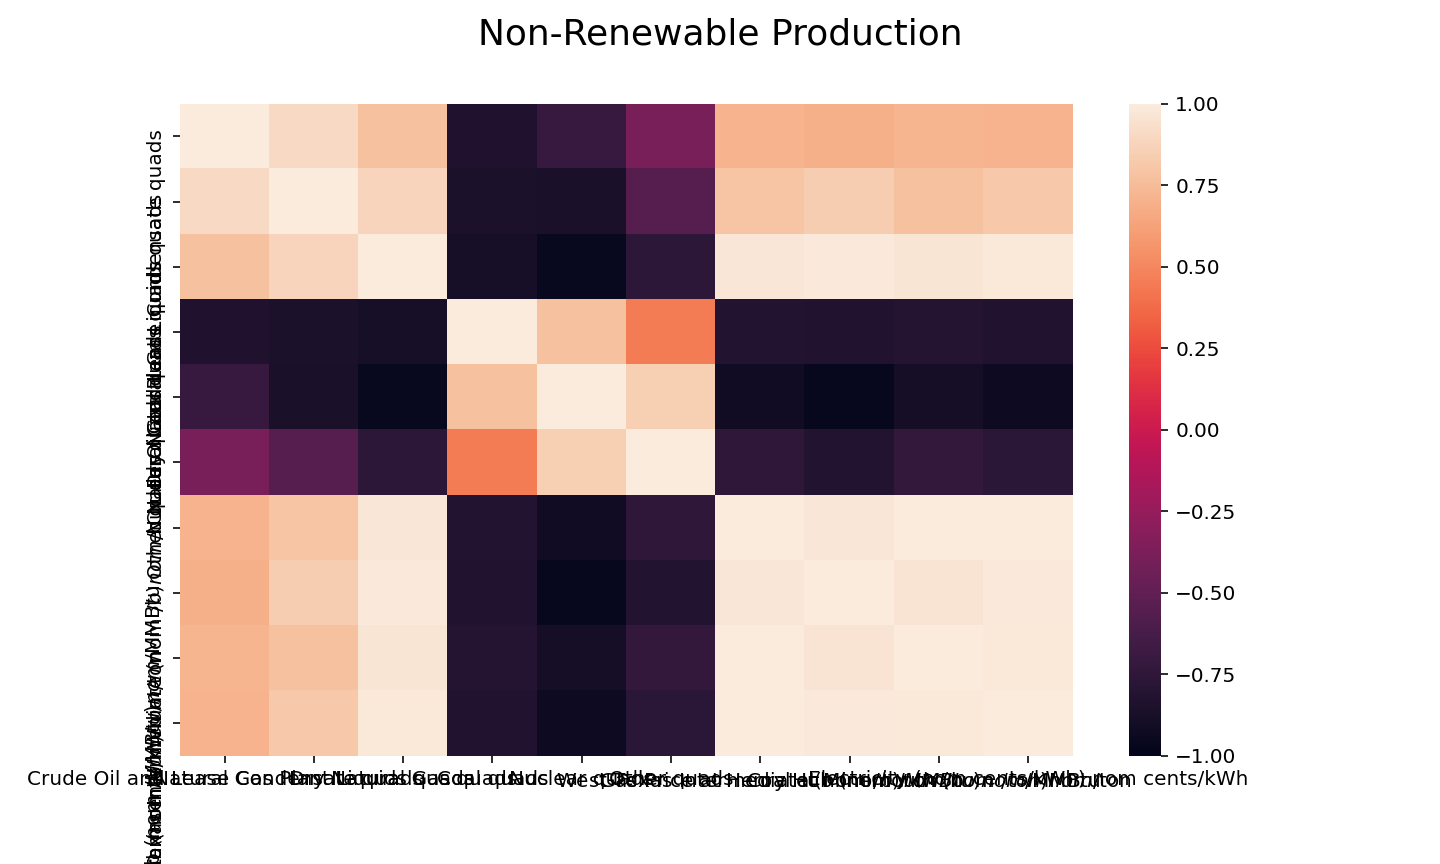
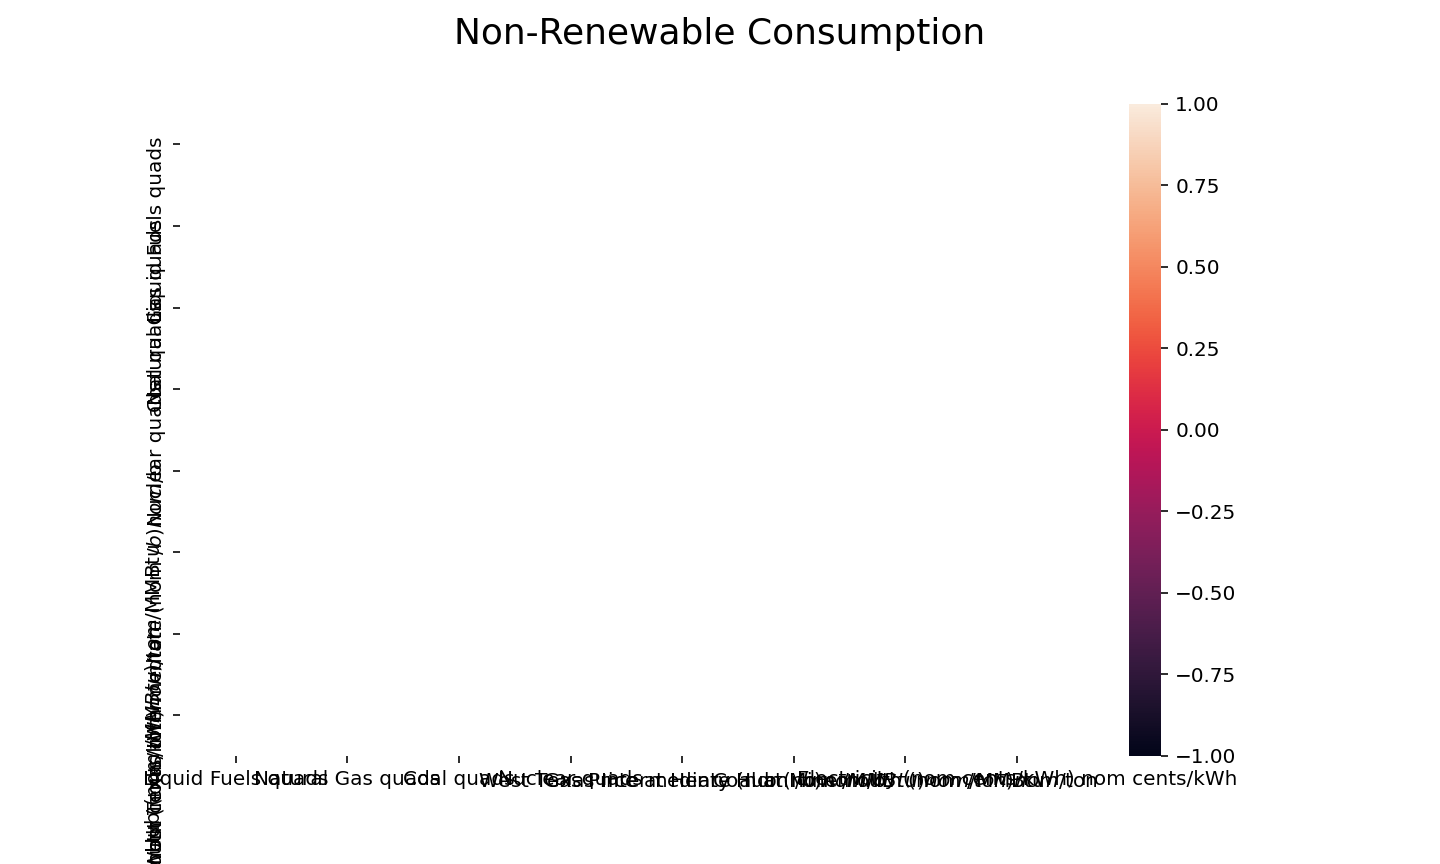

In [30]:
panel.servable()